In [19]:
# Project Overview

# 1. Collect the Data
    # Use the NumPy module to generate more than 1,500 random latitudes and longitudes.
    # Use the citipy module to list the nearest city to the latitudes and longitudes.
    # Use the OpenWeatherMap API to request the current weather data from each unique city in your list.
    # Parse the JSON data from the API request.
    # Collect the following data from the JSON file and add it to a DataFrame:
        # - City, country, and date
        # - Latitude and longitude
        # - Maximum temperature
        # - Humidity
        # - Cloudiness
        # - Wind speed

# 2. Exploratory Analysis with Visualization
    # Create scatter plots of the weather data for the following comparisons:
        # - Latitude versus temperature
        # - Latitude versus humidity
        # - Latitude versus cloudiness
        # - Latitude versus wind speed
    # Determine the correlations for the following weather data:
        # - Latitude and temperature
        # - Latitude and humidity
        # - Latitude and cloudiness
        # - Latitude and wind speed
    # Create a series of heatmaps using the Google Maps and Places API that showcases the following:
        # - Latitude and temperature
        # - Latitude and humidity
        # - Latitude and cloudiness
        # - Latitude and wind speed

# 3. Visualize Travel Data
    # Create a heatmap with pop-up markers that can display information on specific cities based on a customer’s 
    # travel preferences. Complete these steps:
        # 1. Filter the Pandas DataFrame based on user inputs for a minimum and maximum temperature.
        # 2. Create a heatmap for the new DataFrame.
        # 3. Find a hotel from the cities’ coordinates using Google’s Maps and Places API, and Search Nearby feature.
        # 4. Store the name of the first hotel in the DataFrame.
        # 5. Add pop-up markers to the heatmap that display information about the city, current maximum temperature, 
        #    and a hotel in the city.

In [20]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import citipy 
from citipy import citipy
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime

In [21]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

# Pack the latitudes (lats) and longitudes (lngs) as pairs by zipping them (lat_lngs) with the zip() function.
lat_lngs = zip(lats, lngs) 
lat_lngs 

In [22]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [23]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

# 1. We create a cities list to store city names.
# 2. We iterate through the coordinates, as in our practice, 
#    and retrieve the nearest city using the latitude and longitude pair.
# 3. We add a decision statement with the logical operator not in to determine whether the found city is already
#    in the cities list. If not, then we’ll use the append()function to add it. We are doing this because among 
#    the 1,500 latitudes and longitudes, there might be duplicates, which will retrieve duplicate cities, 
#    and we want to be sure we capture only the unique cities.

620

In [25]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [27]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# - We create the for loop with the enumerate() method and reference the index and the city in the list.
# - In the conditional statement, we check if the remainder of the index divided by 50 is equal to 0 and if the 
#   index is greater than or equal to 50. If the statement is true, then the set_count and the record_count are 
#   equal to 1.
# - Inside the conditional statement, we create the URL endpoint for each city, as before. 
#   However, we are removing the blank spaces in the city name and concatenating the city name with, 
#   city.replace(" ","+"). This will find the corresponding weather data for the city instead of finding the weather 
#   data for the first part of the city name.
# - Also, we add a print statement that tells us the record count and set count, and the city that is being processed.
# - Then we add one to the record count before the next city is processed.
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

# - We parse the JSON file for the current city.
    # - If there is no weather data for the city, i.e. , a <Response [404]> then there is no weather to retrieve 
    #   and City not found. Skipping... is printed.
# - If there is weather data for the city, we will retrieve the latitude, longitude, maximum temperature, humidity, 
#   cloudiness, wind speed, and date and assign those values to variables.
    # - We could write a try-except block for each one of these parameters to handle the KeyError if the data wasn’t 
    #   found, but since these parameters are always present in the response this won’t be necessary.
# - We append the cities list with a dictionary for that city, where the key-value pairs are the values from our 
#   weather parameters.
# - Finally, below the try block and after the except block, we add the closing print statement, 
#   which will let us know the data retrieval has been completed. Make sure that your except block is indented 
#   and in line with the try block, and that the print statements are flush with the margin.
# - Under the print statement in the except block, we add the pass statement, which is a general purpose statement 
#   to handle all errors encountered and to allow the program to continue.


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ngunguru
Processing Record 2 of Set 1 | chuy
Processing Record 3 of Set 1 | chabahar
Processing Record 4 of Set 1 | clyde river
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | lebu
Processing Record 8 of Set 1 | hilo
Processing Record 9 of Set 1 | new norfolk
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | jiangyou
Processing Record 13 of Set 1 | pemangkat
Processing Record 14 of Set 1 | moron
Processing Record 15 of Set 1 | cabo san lucas
Processing Record 16 of Set 1 | ancud
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | talnakh
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 21 of Set 1 | punta arenas
Processing Record 22 of Set 1 | cape town
Processing Record 23 o

Processing Record 37 of Set 4 | rawson
Processing Record 38 of Set 4 | naberera
Processing Record 39 of Set 4 | krutinka
Processing Record 40 of Set 4 | waipawa
Processing Record 41 of Set 4 | vestmannaeyjar
Processing Record 42 of Set 4 | sarkand
Processing Record 43 of Set 4 | nguiu
City not found. Skipping...
Processing Record 44 of Set 4 | mariveles
Processing Record 45 of Set 4 | san juan
Processing Record 46 of Set 4 | nome
Processing Record 47 of Set 4 | dikson
Processing Record 48 of Set 4 | carmelo
Processing Record 49 of Set 4 | avera
Processing Record 50 of Set 4 | bosaso
Processing Record 1 of Set 5 | mehamn
Processing Record 2 of Set 5 | tuatapere
Processing Record 3 of Set 5 | olga
Processing Record 4 of Set 5 | nehe
Processing Record 5 of Set 5 | castro
Processing Record 6 of Set 5 | namibe
Processing Record 7 of Set 5 | atuona
Processing Record 8 of Set 5 | boa vista
Processing Record 9 of Set 5 | havre-saint-pierre
Processing Record 10 of Set 5 | taoudenni
Processing R

Processing Record 27 of Set 8 | la ronge
Processing Record 28 of Set 8 | hambantota
Processing Record 29 of Set 8 | tongzi
Processing Record 30 of Set 8 | el campo
Processing Record 31 of Set 8 | concepcion del oro
Processing Record 32 of Set 8 | buin
Processing Record 33 of Set 8 | perth
Processing Record 34 of Set 8 | liverpool
Processing Record 35 of Set 8 | edd
Processing Record 36 of Set 8 | dzhalka
Processing Record 37 of Set 8 | constitucion
Processing Record 38 of Set 8 | ribeira grande
Processing Record 39 of Set 8 | deniliquin
Processing Record 40 of Set 8 | kupang
Processing Record 41 of Set 8 | llorente
Processing Record 42 of Set 8 | ishigaki
Processing Record 43 of Set 8 | fort-shevchenko
Processing Record 44 of Set 8 | magui
City not found. Skipping...
Processing Record 45 of Set 8 | necochea
Processing Record 46 of Set 8 | moratuwa
Processing Record 47 of Set 8 | lagoa
Processing Record 48 of Set 8 | gravdal
Processing Record 49 of Set 8 | rio bueno
Processing Record 50

Processing Record 15 of Set 12 | buchanan
Processing Record 16 of Set 12 | caconda
Processing Record 17 of Set 12 | villa rica
Processing Record 18 of Set 12 | kloulklubed
Processing Record 19 of Set 12 | yerbogachen
Processing Record 20 of Set 12 | mangalam
Processing Record 21 of Set 12 | falealupo
City not found. Skipping...
Processing Record 22 of Set 12 | carballo
Processing Record 23 of Set 12 | churapcha
Processing Record 24 of Set 12 | waitati
Processing Record 25 of Set 12 | nador
Processing Record 26 of Set 12 | phan thiet
Processing Record 27 of Set 12 | bitkine
Processing Record 28 of Set 12 | seoul
Processing Record 29 of Set 12 | bereda
Processing Record 30 of Set 12 | atambua
Processing Record 31 of Set 12 | san carlos del zulia
Processing Record 32 of Set 12 | araouane
Processing Record 33 of Set 12 | nusaybin
Processing Record 34 of Set 12 | hamilton
Processing Record 35 of Set 12 | ulcinj
Processing Record 36 of Set 12 | matara
Processing Record 37 of Set 12 | khasan


In [31]:
len(city_data)

573

In [32]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ngunguru,-35.62,174.50,62.01,3,20,7.00,NZ,2020-07-11 23:44:09
1,Chuy,-33.70,-53.46,44.55,70,49,5.88,UY,2020-07-11 23:44:09
2,Chabahar,25.29,60.64,84.04,85,87,8.84,IR,2020-07-11 23:43:18
3,Clyde River,70.47,-68.59,44.69,64,22,9.01,CA,2020-07-11 23:44:09
4,Bluff,-46.60,168.33,47.23,80,99,18.07,NZ,2020-07-11 23:44:10
5,Ushuaia,-54.80,-68.30,35.60,80,20,18.34,AR,2020-07-11 23:42:49
6,Lebu,-37.62,-73.65,49.71,80,94,8.14,CL,2020-07-11 23:44:10
7,Hilo,19.73,-155.09,82.40,65,75,8.05,US,2020-07-11 23:44:11
8,New Norfolk,-42.78,147.06,46.00,93,67,0.78,AU,2020-07-11 23:44:11
9,Busselton,-33.65,115.33,46.00,78,0,16.04,AU,2020-07-11 23:44:11


In [33]:
# Reorder columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ngunguru,NZ,2020-07-11 23:44:09,-35.62,174.50,62.01,3,20,7.00
1,Chuy,UY,2020-07-11 23:44:09,-33.70,-53.46,44.55,70,49,5.88
2,Chabahar,IR,2020-07-11 23:43:18,25.29,60.64,84.04,85,87,8.84
3,Clyde River,CA,2020-07-11 23:44:09,70.47,-68.59,44.69,64,22,9.01
4,Bluff,NZ,2020-07-11 23:44:10,-46.60,168.33,47.23,80,99,18.07


In [34]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [35]:
# Create a series of scatter plots for each weather parameter against the latitude for all the cities.

# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

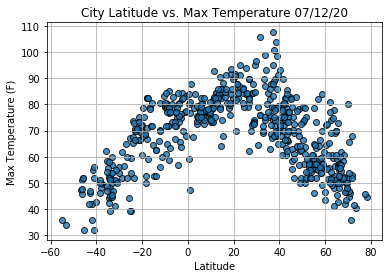

In [38]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

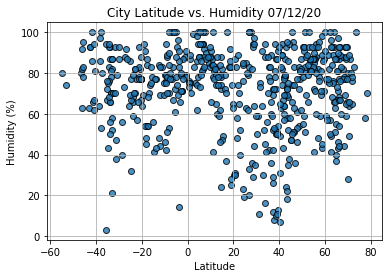

In [39]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

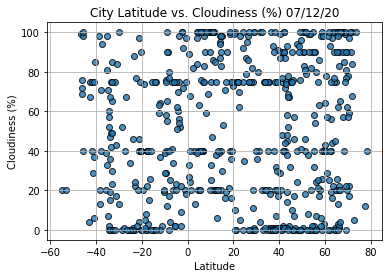

In [40]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

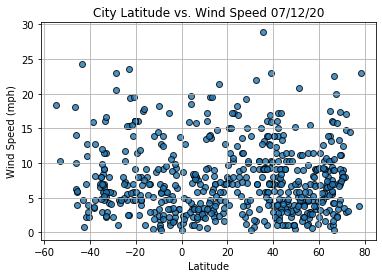

In [41]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()